In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_excel("job_prediction_dataset_final (1).xlsx")


In [55]:
# Drop initial junk row if needed (row 0 seems to be a dashed line)
df = df[~df["uuid"].str.contains("---", na=False)].reset_index(drop=True)

In [56]:
print( df.head())

                                       uuid    status    system  \
0  c6c6bfbe-8f6a-47aa-b8ef-ac74e31c32df-007  FINISHED  frontera   
1  791b6e3b-ac7a-4ea3-86f4-a49c499a0dbf-007  FINISHED  frontera   
2  f7f77b4c-b63f-451a-a838-69c992ab60d6-007  FINISHED  frontera   
3  1d0d5566-4565-4caf-8b9f-6871037db6ea-007  FINISHED  frontera   
4  9c36342f-d59d-4946-9ec2-023c573c188c-007    FAILED  frontera   

            app_id app_version   tenant  node_count  cores_per_node  \
0  opensees-sp-v35       0.0.1  portals         1.0             1.0   
1  opensees-mp-v35       0.0.1  portals         2.0             1.0   
2  opensees-sp-v35       0.0.1  portals         1.0             1.0   
3  opensees-sp-v35       0.0.1  portals         1.0             1.0   
4  opensees-sp-v35       0.0.1  portals        32.0             1.0   

   max_minutes  _tapisMemoryMB  _tapisNodes _tapisExecSystemId solver mesh  \
0        118.0           100.0          1.0           frontera    NaN  NaN   
1        120.0

In [57]:

print("🔍 Missing values per column:\n", df.isnull().sum())

🔍 Missing values per column:
 uuid                     0
status                   0
system                   0
app_id                   0
app_version              0
tenant                   0
node_count               0
cores_per_node           0
max_minutes              0
_tapisMemoryMB           0
_tapisNodes              0
_tapisExecSystemId       0
solver                1968
mesh                  1968
decomp                1968
dtype: int64


In [58]:

df = df.drop(columns=["uuid", "solver", "mesh", "decomp"])

df.head()


,status,system,app_id,app_version,tenant,node_count,cores_per_node,max_minutes,_tapisMemoryMB,_tapisNodes,_tapisExecSystemId
0,FINISHED,frontera,opensees-sp-v35,0.0.1,portals,1.0,1.0,118.0,100.0,1.0,frontera
1,FINISHED,frontera,opensees-mp-v35,0.0.1,portals,2.0,1.0,120.0,100.0,2.0,frontera
2,FINISHED,frontera,opensees-sp-v35,0.0.1,portals,1.0,1.0,120.0,100.0,1.0,frontera
3,FINISHED,frontera,opensees-sp-v35,0.0.1,portals,1.0,1.0,120.0,100.0,1.0,frontera
4,FAILED,frontera,opensees-sp-v35,0.0.1,portals,32.0,1.0,120.0,100.0,32.0,frontera


In [59]:
for col in df.columns:
    print(f"\nUnique values in column '{col}':")
    print(df[col].unique())


Unique values in column 'status':
['FINISHED' 'FAILED' 'CANCELLED' 'QUEUED']

Unique values in column 'system':
['frontera' 'ls6' 'stampede3']

Unique values in column 'app_id':
['opensees-sp-v35' 'opensees-mp-v35' 'opensees-mp-ls6' 'opensees-sp-ls6'
 'matlab-batch' 'opensees-mp-s3' 'openfoam-stampede3']

Unique values in column 'app_version':
['0.0.1' '3.5.1' '3.5.0' '23.2' '3.6.0' '12.0.0' '3.7.0' 'latest']

Unique values in column 'tenant':
['portals' 'designsafe']

Unique values in column 'node_count':
[ 1.  2. 32.  3.  4. 10. 20. 48.  6. 12. 15. 24.  5. 11.  7. 30.  8. 70.
 16. 90.]

Unique values in column 'cores_per_node':
[  1.  16.   2.   4.  56.  48.  30.  50.  25.  26.  10.  12.  20.  14.
  11.   8.  19.  17.  13.  15.   5.  32.  23. 112.   9.  60.  28.   7.
  36.   6.  31.  35.   3.  42.  40.  41.  18.  24.  33.  27.  45.  43.
  44. 128.]

Unique values in column 'max_minutes':
[1.180e+02 1.200e+02 1.000e+00 5.000e+00 1.100e+01 2.200e+01 2.000e+01
 1.200e+01 6.000e+02 1.44

In [60]:
numeric_cols = [
    'node_count',
    'cores_per_node',
    'max_minutes',
    '_tapisMemoryMB',
    '_tapisNodes'
]


for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  
    df[col] = df[col].fillna(0).astype(int)           


print(df.dtypes[numeric_cols])

node_count        int64
cores_per_node    int64
max_minutes       int64
_tapisMemoryMB    int64
_tapisNodes       int64
dtype: object


In [61]:
df.head()


,status,system,app_id,app_version,tenant,node_count,cores_per_node,max_minutes,_tapisMemoryMB,_tapisNodes,_tapisExecSystemId
0,FINISHED,frontera,opensees-sp-v35,0.0.1,portals,1,1,118,100,1,frontera
1,FINISHED,frontera,opensees-mp-v35,0.0.1,portals,2,1,120,100,2,frontera
2,FINISHED,frontera,opensees-sp-v35,0.0.1,portals,1,1,120,100,1,frontera
3,FINISHED,frontera,opensees-sp-v35,0.0.1,portals,1,1,120,100,1,frontera
4,FAILED,frontera,opensees-sp-v35,0.0.1,portals,32,1,120,100,32,frontera


In [62]:
for col in df.columns:
    print(f"\nUnique values in column '{col}':")
    print(df[col].unique())


Unique values in column 'status':
['FINISHED' 'FAILED' 'CANCELLED' 'QUEUED']

Unique values in column 'system':
['frontera' 'ls6' 'stampede3']

Unique values in column 'app_id':
['opensees-sp-v35' 'opensees-mp-v35' 'opensees-mp-ls6' 'opensees-sp-ls6'
 'matlab-batch' 'opensees-mp-s3' 'openfoam-stampede3']

Unique values in column 'app_version':
['0.0.1' '3.5.1' '3.5.0' '23.2' '3.6.0' '12.0.0' '3.7.0' 'latest']

Unique values in column 'tenant':
['portals' 'designsafe']

Unique values in column 'node_count':
[ 1  2 32  3  4 10 20 48  6 12 15 24  5 11  7 30  8 70 16 90]

Unique values in column 'cores_per_node':
[  1  16   2   4  56  48  30  50  25  26  10  12  20  14  11   8  19  17
  13  15   5  32  23 112   9  60  28   7  36   6  31  35   3  42  40  41
  18  24  33  27  45  43  44 128]

Unique values in column 'max_minutes':
[ 118  120    1    5   11   22   20   12  600 1440 1100  500  599  400
  360  399    2   50  180  240 1260 1400  540  480  760   60   61   90
 1050  960  850  800

In [63]:

print("Shape:", df.shape)


print("\nInfo:")
print(df.info())


print("\nMissing values:")
print(df.isnull().sum())


Shape: (2019, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   status              2019 non-null   object
 1   system              2019 non-null   object
 2   app_id              2019 non-null   object
 3   app_version         2019 non-null   object
 4   tenant              2019 non-null   object
 5   node_count          2019 non-null   int64 
 6   cores_per_node      2019 non-null   int64 
 7   max_minutes         2019 non-null   int64 
 8   _tapisMemoryMB      2019 non-null   int64 
 9   _tapisNodes         2019 non-null   int64 
 10  _tapisExecSystemId  2019 non-null   object
dtypes: int64(5), object(6)
memory usage: 173.6+ KB
None

Missing values:
status                0
system                0
app_id                0
app_version           0
tenant                0
node_count            0
cores_per_node        0
ma

In [64]:

sns.set(style="whitegrid")

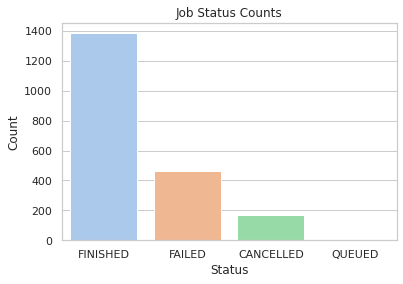

In [65]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="status", palette="pastel")
plt.title("Job Status Counts")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


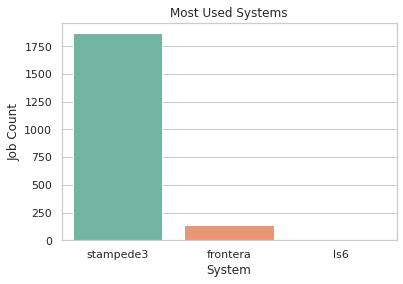

In [66]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="system", order=df["system"].value_counts().index, palette="Set2")
plt.title("Most Used Systems")
plt.xlabel("System")
plt.ylabel("Job Count")
plt.show()


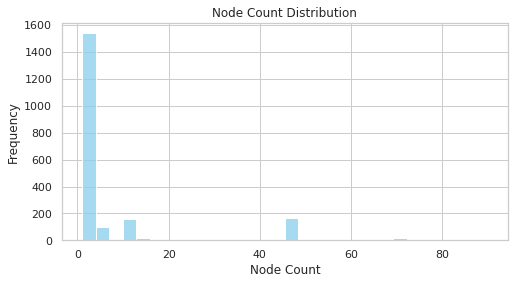

In [67]:
plt.figure(figsize=(8,4))
sns.histplot(df['node_count'], bins=30, kde=False, color="skyblue")
plt.title("Node Count Distribution")
plt.xlabel("Node Count")
plt.ylabel("Frequency")
plt.show()


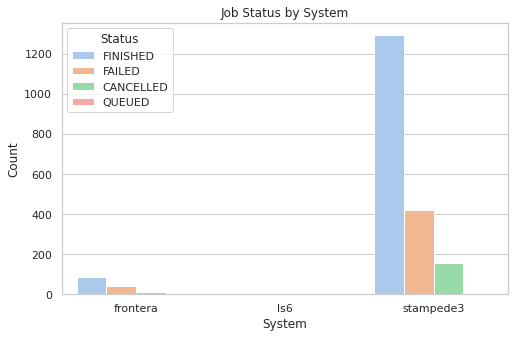

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="system", hue="status", palette="pastel")
plt.title("Job Status by System")
plt.xlabel("System")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()


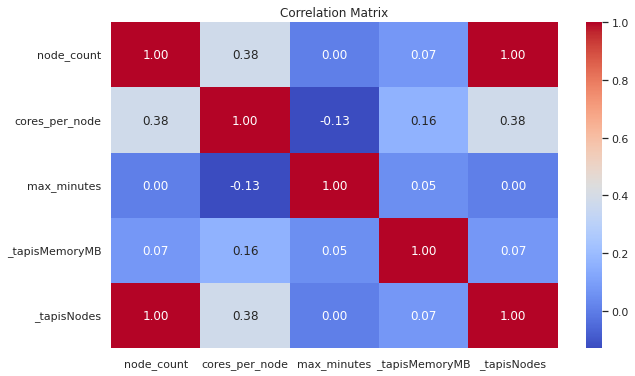

In [69]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


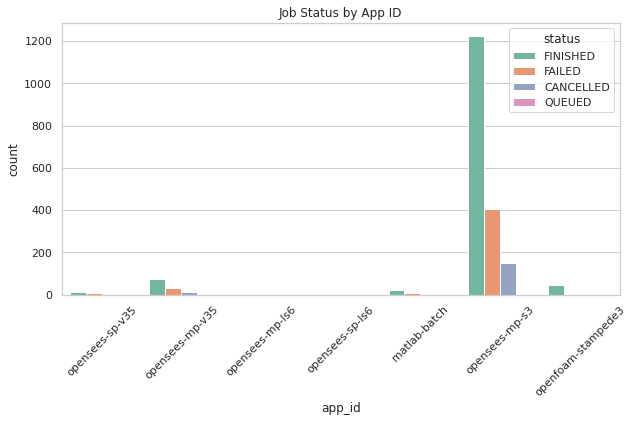

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="app_id", hue="status", palette="Set2")
plt.title("Job Status by App ID")
plt.xticks(rotation=45)
plt.show()


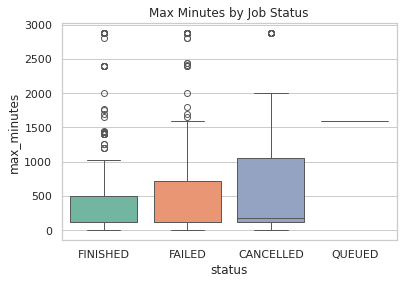

In [71]:
sns.boxplot(data=df, x="status", y="max_minutes", palette="Set2")
plt.title("Max Minutes by Job Status")
plt.show()


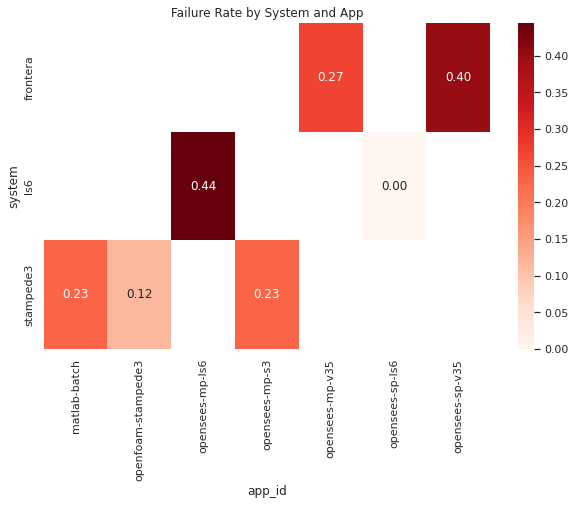

In [72]:
failure_rate = df.groupby(['system', 'app_id'])['status'].apply(lambda x: (x == 'FAILED').mean()).unstack()
plt.figure(figsize=(10,6))
sns.heatmap(failure_rate, annot=True, fmt=".2f", cmap="Reds")
plt.title("Failure Rate by System and App")
plt.show()


In [ ]:
pip install catboost shap


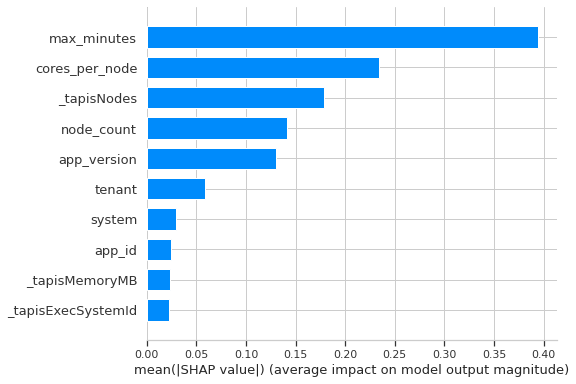

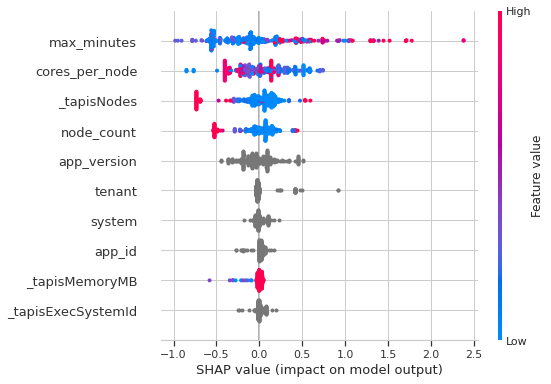

In [73]:
import pandas as pd
import shap
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel("job_prediction_dataset_final (1).xlsx")

df.drop(columns=["uuid", "solver", "mesh", "decomp"], inplace=True)

df['status'] = df['status'].map({'FINISHED': 0, 'FAILED': 1})  # Binary classification
cat_features = df.select_dtypes(include=['object']).columns.tolist()

df = df[df['status'].notna()]
df['status'] = df['status'].astype(int)

for col in df.select_dtypes(include=['float', 'int']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

from sklearn.model_selection import train_test_split
X = df.drop("status", axis=1)
y = df["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for col in cat_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

model = CatBoostClassifier(verbose=0)
model.fit(train_pool)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

shap.summary_plot(shap_values, X_test)


## Interpreting key features:
### max_minutes
- High values (red dots) push SHAP to the right → increase chance of failure.

- Low values (blue) → mostly left side → reduce failure risk.

Conclusion: Submitting long jobs increases the failure probability.

## cores_per_node
- Mixed effect, but higher values (red) often push the prediction toward failure.

Conclusion: Over-provisioning cores may increase failure rate.

### _tapisNodes, node_count
- High node usage increases failure risk.

Conclusion: Large-scale jobs are more likely to fail.

### app_version
Certain versions push toward success/failure.

Possible: Some app versions may be buggy or unstable.

### Low impact features:
_tapisMemoryMB, _tapisExecSystemId, app_id have minimal influence on the model’s decision.



In [75]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score
import pandas as pd


feature_sets = [
    ['max_minutes', 'cores_per_node'],
    ['max_minutes', 'cores_per_node', '_tapisNodes'],
    ['max_minutes', 'cores_per_node', '_tapisNodes', 'node_count'],
    ['max_minutes', 'cores_per_node', '_tapisNodes', 'node_count', 'app_version'],
    ['max_minutes', 'cores_per_node', '_tapisNodes', 'node_count', 'app_version', 'tenant'],
    df.columns.drop('status').tolist()  
]

results = []

for features in feature_sets:
    X = df[features].copy()
    y = df['status']

    
    cat_feats = X.select_dtypes(include='object').columns.tolist()
    for col in cat_feats:
        X[col] = X[col].astype(str)

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    train_pool = Pool(X_train, y_train, cat_features=cat_feats)
    test_pool = Pool(X_test, y_test, cat_features=cat_feats)

    
    model = CatBoostClassifier(verbose=0)
    model.fit(train_pool)

    
    preds = model.predict(test_pool)
    acc = accuracy_score(y_test, preds)

    results.append({
        'Features Used': ', '.join(features),
        'Accuracy (%)': round(acc * 100, 2)
    })


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy (%)', ascending=False)
display(results_df)


,Features Used,Accuracy (%)
4,"max_minutes, cores_per_node, _tapisNodes, node...",81.62
3,"max_minutes, cores_per_node, _tapisNodes, node...",81.08
5,"system, app_id, app_version, tenant, node_coun...",80.54
2,"max_minutes, cores_per_node, _tapisNodes, node...",78.11
1,"max_minutes, cores_per_node, _tapisNodes",77.57
0,"max_minutes, cores_per_node",74.32


In [76]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df = pd.read_excel("job_prediction_dataset_final (1).xlsx")


df.drop(columns=["uuid", "solver", "mesh", "decomp"], inplace=True)


df['status'] = df['status'].map({'FINISHED': 0, 'FAILED': 1})


df = df[df['status'].notna()]


cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    df[col] = df[col].astype('category')


X = df.drop("status", axis=1)
y = df["status"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
model.fit(X_train, y_train)

preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")


XGBoost Accuracy: 79.46%


In [77]:
model.save_model("job_failure_predictor.cbm")


In [78]:
import joblib


joblib.dump({
    "feature_names": X_train.columns.tolist(),
    "cat_features": cat_features
}, "model_metadata.pkl")


['model_metadata.pkl']

In [43]:
import os
os.listdir()


['.profile',
 '.bashrc',
 '.bash_logout',
 'Untitled.ipynb',
 'catboost_info',
 '.local',
 'job_failure_predictor.cbm',
 '.ipython',
 '.ipynb_checkpoints',
 '.cache',
 'Work',
 '.config',
 'job_prediction_dataset_final (1).xlsx',
 '.tapis-token',
 'Untitled Folder',
 'JobPrediction.ipynb',
 'model_metadata.pkl',
 'CommunityData',
 'NEES',
 'NHERI-Published',
 'MyData',
 '.jupyter',
 '.conda',
 '.OpenSees',
 '.julia',
 '.wget-hsts',
 '.hushlogin',
 '.npm',
 '.python',
 '.bash_history']

In [44]:
import zipfile

with zipfile.ZipFile("job_failure_model_bundle.zip", "w") as zipf:
    zipf.write("job_failure_predictor.cbm")
    zipf.write("model_metadata.pkl")  
    zipf.write("job_prediction_dataset_final (1).xlsx")  
